In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
url = "https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv"
df = pd.read_csv(url)
df["Date"] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.columns = df.columns.str.lower()
df = df.set_index('date')

df.head(5)

,consumption,wind,solar,wind+solar
date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [ ]:
df["weekday"] = df.index.day_name()
df["month"] = df.index.month_name()
df

,consumption,wind,solar,wind+solar,weekday,month
date,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,Sunday,January
2006-01-02,1380.52100,NaN,NaN,NaN,Monday,January
2006-01-03,1442.53300,NaN,NaN,NaN,Tuesday,January
2006-01-04,1457.21700,NaN,NaN,NaN,Wednesday,January
2006-01-05,1477.13100,NaN,NaN,NaN,Thursday,January
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,Wednesday,December
2017-12-28,1299.86398,506.424,14.162,520.586,Thursday,December
2017-12-29,1295.08753,584.277,29.854,614.131,Friday,December


<AxesSubplot:xlabel='weekday', ylabel='consumption'>

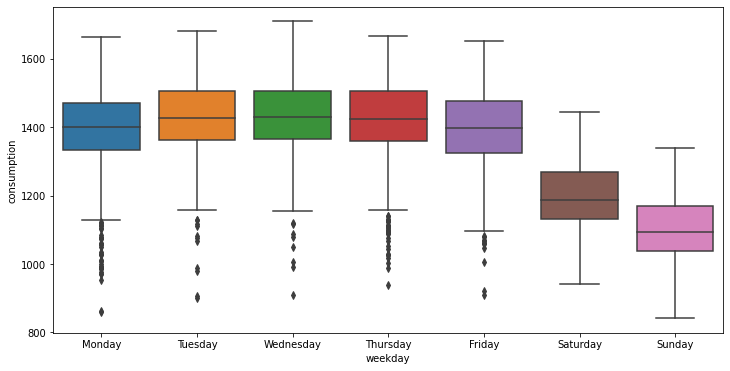

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, 
            x="weekday", 
            y="consumption",
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday', 'Sunday'])

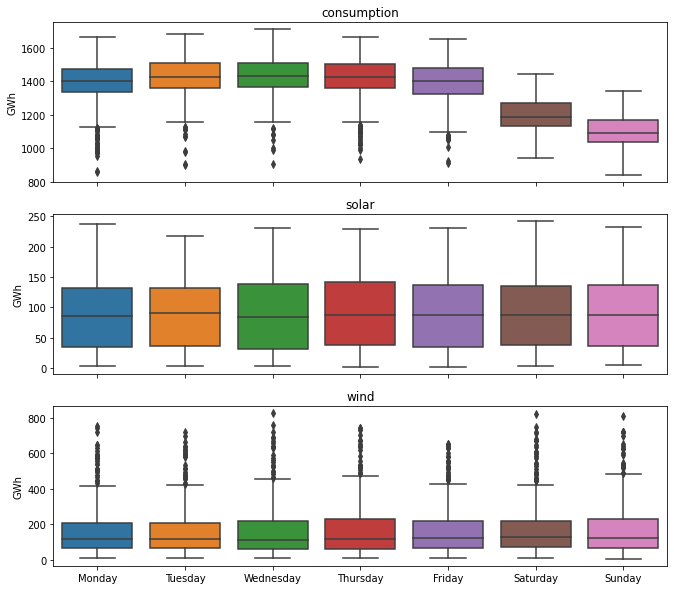

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
columns_to_plot = ['consumption', 'solar', 'wind']

for name, ax in zip(columns_to_plot, axes):
    sns.boxplot(data=df, 
                x='weekday', 
                y=name, 
                ax=ax,
                order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday', 'Sunday'])  
    ax.set_ylabel('GWh')
    ax.set_title(name)
    ax.set_xlabel('')

<AxesSubplot:xlabel='month', ylabel='consumption'>

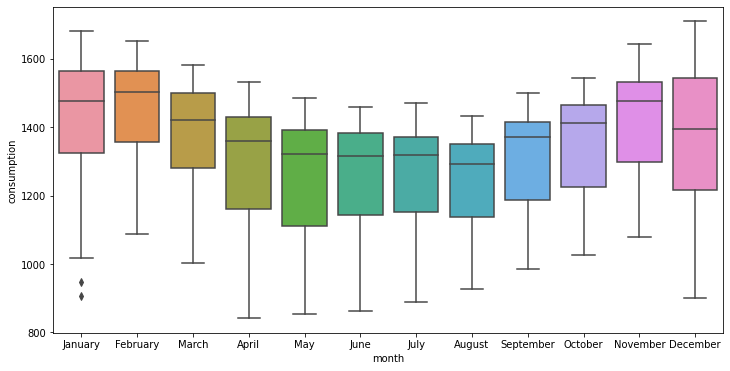

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, 
            x="month", 
            y="consumption")

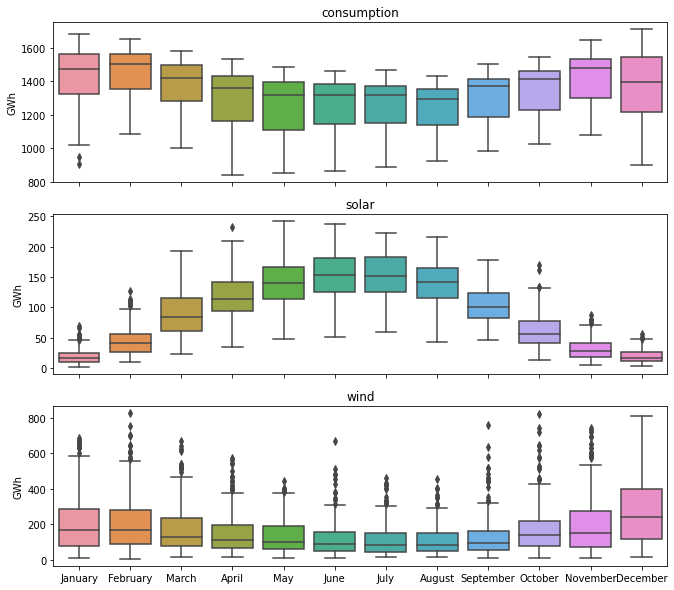

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
columns_to_plot = ['consumption', 'solar', 'wind']

for name, ax in zip(columns_to_plot, axes):
    sns.boxplot(data=df, 
                x='month', 
                y=name, 
                ax=ax)  
    ax.set_ylabel('GWh')
    ax.set_title(name)
    ax.set_xlabel('')

<AxesSubplot:xlabel='date', ylabel='consumption'>

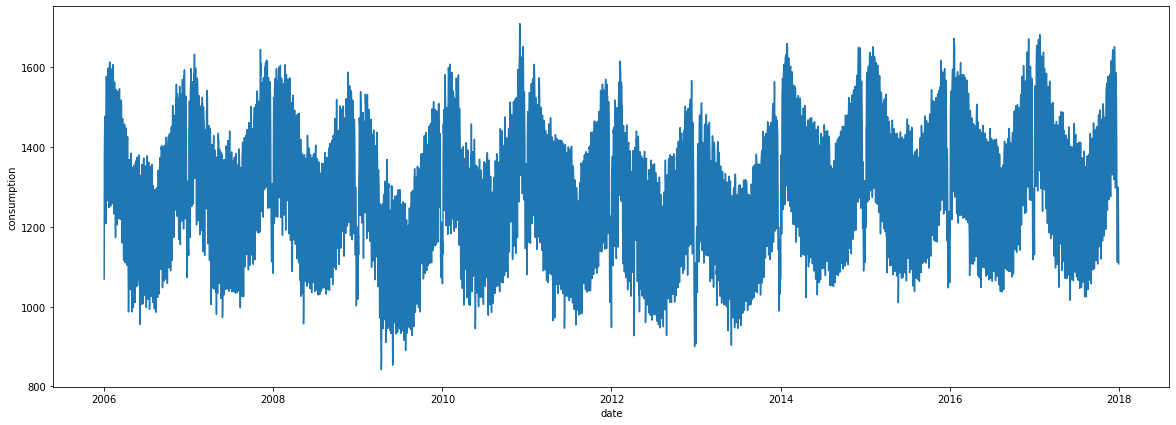

In [ ]:
fig, ax = plt.subplots(figsize = (20,7))

sns.lineplot(data=df,
            x=df.index, 
            y="consumption")

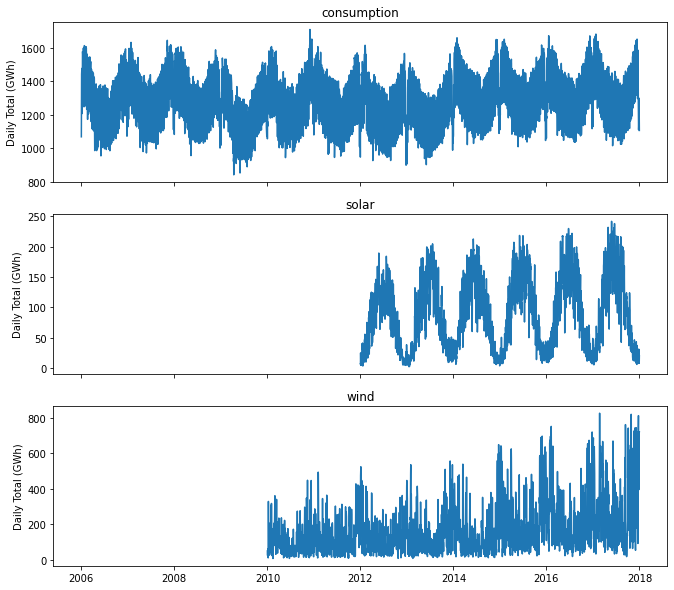

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
columns_to_plot = ['consumption', 'solar', 'wind']

for name, ax in zip(columns_to_plot, axes):
    sns.lineplot(data=df,
                x=df.index, 
                y=name,
                ax=ax)
    ax.set_ylabel("Daily Total (GWh)")
    ax.set_title(name)
    ax.set_xlabel('')

In [ ]:
import matplotlib.dates as mdates


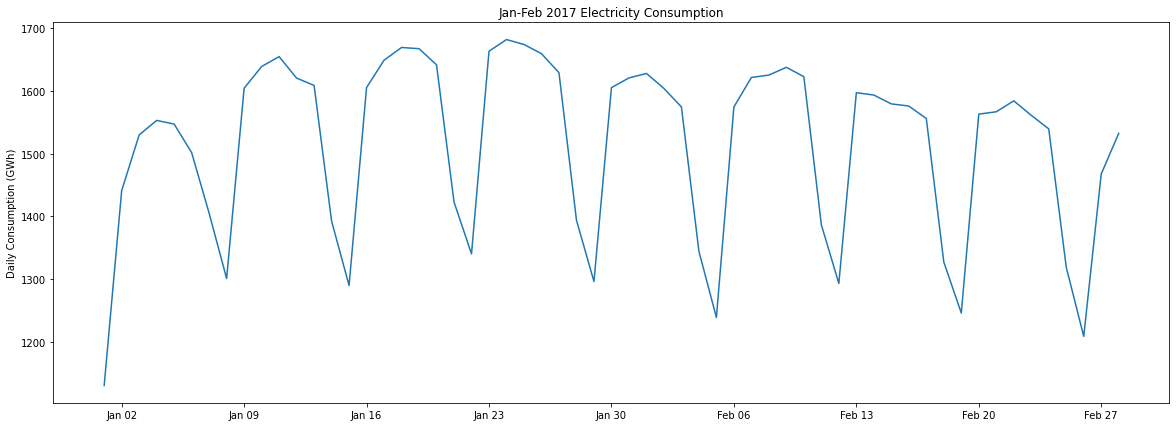

In [ ]:
fig, ax = plt.subplots(figsize = (20,7))
df_filtered = df.loc['2017-01':'2017-02']

sns.lineplot(data=df_filtered, 
            x=df_filtered.index, 
            y="consumption")

ax.set_title('Jan-Feb 2017 Electricity Consumption')
ax.set_xlabel('')
ax.set_ylabel('Daily Consumption (GWh)')
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY)) # major ticks to weekly interval, on Mondays
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d')) # b = 3-letter month

# Rolling average

In [ ]:
data_columns = ['consumption', 'wind', 'solar']
df_7_rolling_average = df[data_columns].rolling(window = 7, center = True).mean()
df_7_rolling_average.head()

,consumption,wind,solar
date,,,
2006-01-01,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN
2006-01-05,1381.300143,NaN,NaN


In [ ]:
data_columns = ['consumption', 'wind', 'solar', 'wind+solar']
df_365_rolling_average = df[data_columns].rolling(window = 365, center = True).mean()
df_365_rolling_average.head()

,consumption,wind,solar,wind+solar
date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,NaN,NaN,NaN,NaN
2006-01-05,NaN,NaN,NaN,NaN


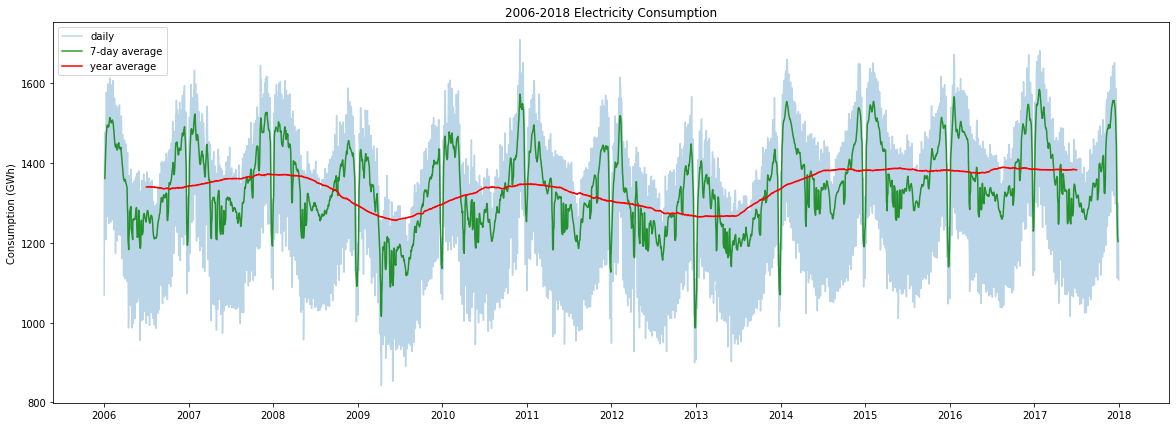

In [ ]:
fig, ax = plt.subplots(figsize = (20,7))

sns.lineplot(data=df, 
            x=df.index, 
            y="consumption", 
            alpha=0.3,
            label="daily")

sns.lineplot(data=df_7_rolling_average, 
            x=df_7_rolling_average.index, 
            y="consumption", 
            alpha=0.8, 
            color="green",
            label="7-day average")
            
sns.lineplot(data=df_365_rolling_average, 
            x=df_365_rolling_average.index, 
            y="consumption", 
            alpha=1, 
            color="red",
            label="year average")

            
ax.set_title('2006-2018 Electricity Consumption')
ax.set_xlabel('')
ax.set_ylabel('Consumption (GWh)')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.legend()

# Resampling

In [ ]:
df_weekly = df.resample('W').mean() # W stands for weekly

df_monthly = df.resample('M').mean() # M stands for weekly
df_monthly.head()

,consumption,wind,solar,wind+solar
date,,,,
2006-01-31,1461.442065,NaN,NaN,NaN
2006-02-28,1467.106893,NaN,NaN,NaN
2006-03-31,1418.649161,NaN,NaN,NaN
2006-04-30,1275.058900,NaN,NaN,NaN
2006-05-31,1253.488484,NaN,NaN,NaN


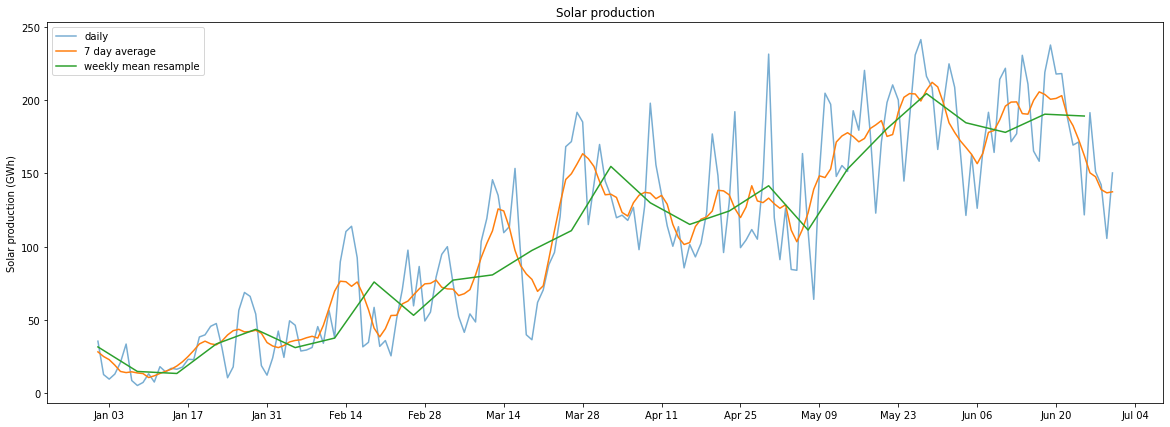

In [ ]:
start, end = '2017-01', '2017-06'
df_filtered = df.loc[start:end]
df_weekly_filtered = df_weekly.loc[start:end]
df_7_rolling_average_filtered = df_7_rolling_average[start:end]

fig, ax = plt.subplots(figsize = (20,7))

sns.lineplot(data=df_filtered, 
            x=df_filtered.index, 
            y="solar", 
            alpha=0.6,
            label="daily")
            
sns.lineplot(data=df_7_rolling_average_filtered, 
            x=df_7_rolling_average_filtered.index, 
            y="solar", 
            label="7 day average")

sns.lineplot(data=df_weekly_filtered, 
            x=df_weekly_filtered.index, 
            y="solar", 
            label="weekly mean resample")
            
ax.set_title('Solar production')
ax.set_xlabel('')
ax.set_ylabel('Solar production (GWh)')
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2)) # interval every 2 weeks
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d')) # b = 3-letter month
ax.legend()

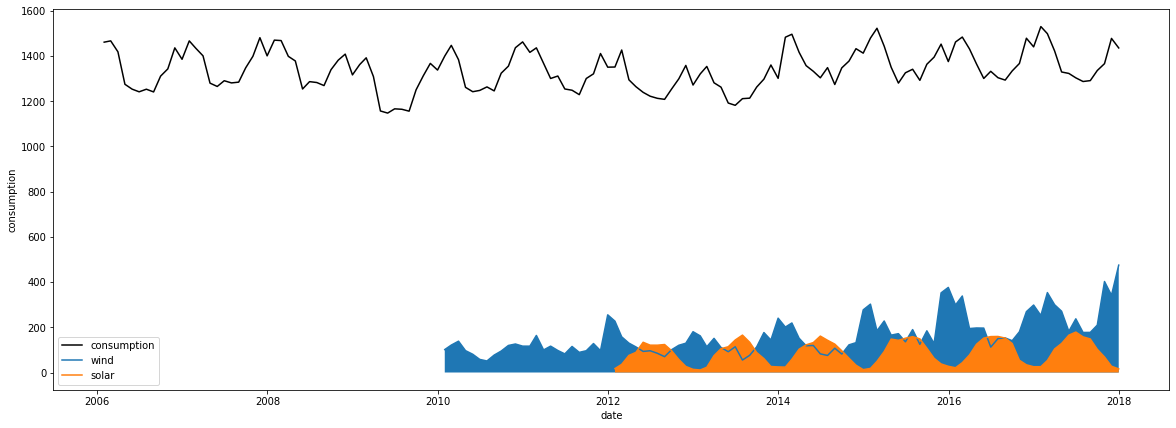

In [ ]:
fig, ax = plt.subplots(figsize = (20,7))

sns.lineplot(data=df_monthly, 
            x=df_monthly.index, 
            y="consumption", 
            color="black",
            label="consumption")
            
sns.lineplot(data=df_monthly, 
            x=df_monthly.index, 
            y="wind", 
            label="wind")
            
sns.lineplot(data=df_monthly, 
            x=df_monthly.index, 
            y="solar", 
            label="solar")

plt.fill_between(df_monthly.index.values, df_monthly["wind"].values)
plt.fill_between(df_monthly.index.values, df_monthly["solar"].values)

Text(0.5, 0, '')

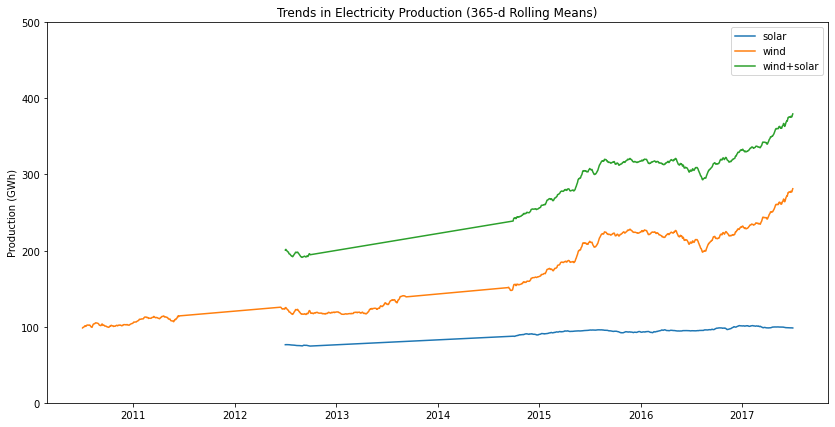

In [ ]:
fig, ax = plt.subplots(figsize = (14,7))

for name in ['solar', 'wind', 'wind+solar']:
    sns.lineplot(data=df_365_rolling_average, 
                x=df_365_rolling_average.index,
                y=name, 
                label=name)  
ax.set_title('Trends in Electricity Production (365-d Rolling Means)');
ax.set_ylabel('Production (GWh)')
ax.set_ylim(0, 500)
ax.set_xlabel('')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7d3ce7c8-a514-49e4-9ba4-a5899ac52ea5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>